In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print((X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [4]:
n_inputs = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape((-1, n_inputs))
Y_train = to_categorical(Y_train)
X_test = X_test.reshape((-1, n_inputs))
Y_test = to_categorical(Y_test)

In [5]:
print((X_train.dtype, Y_train.dtype), (X_test.dtype, Y_test.dtype))

(dtype('uint8'), dtype('float32')) (dtype('uint8'), dtype('float32'))


In [6]:
# We have to change dtype of X_train and X_test to float32, and then we normalize them by dividing 255
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [7]:
# Designing the model including one hidden layer with 512 neurons and one output layer with 10 neurons
# Choosing softmax because labels in mnist are digits from 0 to 9
Model = models.Sequential()
Model.add(layers.Dense(512, activation = 'relu', input_shape = (n_inputs,)))
Model.add(layers.Dense(10, activation = 'softmax'))

In [8]:
# Compiling Model with rmsprop optimization, cross entropy, and accuracy metric
Model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# Train model with mini batch algorithm
fitedModel = Model.fit(X_train, Y_train, epochs = 10, batch_size = 128)

Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.2558 - acc: 0.9257
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1016 - acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0676 - acc: 0.9797
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0487 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0362 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0279 - acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0213 - acc: 0.993 - 7s 110us/step - loss: 0.0214 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0164 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0130 - acc: 0.9962
Epoch 10/10
60000/60000 [============================

In [10]:
history = fitedModel.history
history.keys()

dict_keys(['loss', 'acc'])

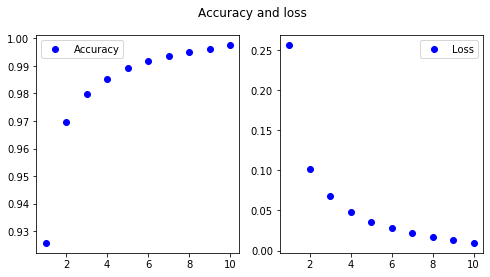

In [14]:
acc = history['acc']
loss = history['loss']
Epochs = range(1, len(acc) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle('Accuracy and loss')
ax1.plot(Epochs, acc, 'bo', label = 'Accuracy')
ax2.plot(Epochs, loss, 'bo', label = 'Loss')
ax1.legend()
ax2.legend()
plt.show()

In [15]:
results_test = Model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 74us/step


In [16]:
results_test

[0.07216728715042846, 0.9818]

In [17]:
Y_hat = Model.predict(X_test)

In [19]:
print(Y_test.dtype, Y_hat.dtype)

float32 float32


In [20]:
confusion_matrix(Y_test.argmax(axis=1), Y_hat.argmax(axis=1))

array([[ 970,    0,    1,    2,    1,    1,    1,    1,    3,    0],
       [   0, 1124,    4,    1,    0,    0,    2,    1,    3,    0],
       [   2,    0, 1014,    0,    1,    0,    2,    8,    4,    1],
       [   0,    0,    6,  989,    0,    2,    0,    4,    1,    8],
       [   0,    0,    5,    1,  956,    0,    2,    7,    0,   11],
       [   2,    0,    0,   11,    1,  871,    2,    0,    4,    1],
       [   4,    2,    0,    1,    3,   10,  938,    0,    0,    0],
       [   0,    0,    6,    0,    0,    0,    0, 1019,    1,    2],
       [   1,    0,    2,    5,    3,    2,    0,    2,  954,    5],
       [   1,    2,    0,    6,    4,    4,    0,    7,    2,  983]],
      dtype=int64)

In [ ]:
# Conclusion: the model achived 99,74% for training and 98.03% for testing, so it is very good for classifying mnist data.
# WE don't nee validation set because we believe that this data is not be affected by time. 